In [204]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [205]:
df = pd.read_csv("TSLA.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)
df = df.drop(columns=["Open", "Low","High", "Adj Close", "Volume"])

In [206]:
df['MA50'] = df.rolling(window=50)["Close"].mean()
#df['MA100'] = df.rolling(window=100)["Close"].mean()

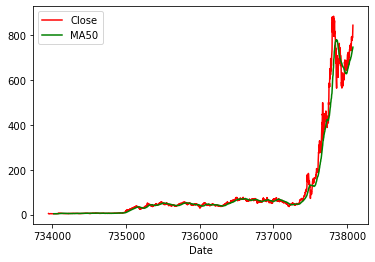

In [207]:
ax1 = df.plot(kind='line', x='Date', y='Close', color='r')    
ax2 = df.plot(kind='line', x='Date', y='MA50', color='g', ax=ax1)
#ax2 = df.plot(kind='line', x='Date', y='MA100', color='b', ax=ax1)   

In [208]:
corrMatrix = df.corr()

In [209]:
corrMatrix.style.background_gradient(cmap='coolwarm')

,Date,Close,MA50
Date,1.000000,0.641504,0.637638
Close,0.641504,1.000000,0.986215
MA50,0.637638,0.986215,1.000000


In [210]:
#ax1 = df.plot(kind='scatter', x='MA50', y='Close', color='r')    
#ax2 = df.plot(kind='scatter', x='MA100', y='Close', color='g', ax=ax1) 

In [211]:
#SCALE THE VALUES
x = df.values 
scaler = preprocessing.MinMaxScaler().fit(x)
x = scaler.transform(x)
df = pd.DataFrame(x)
df = df.iloc[50: , :] # The first 50 rows is used to calculate MA50 and will be nan. Let's drop.
df.head()

,0,1,2
50,0.017450,0.001116,0.000025
51,0.017693,0.000993,0.000006
52,0.018420,0.001118,0.000000
53,0.018662,0.001209,0.000010
54,0.018905,0.001405,0.000040


In [212]:
#ax1 = df.plot(kind='line', x=0, y=1, color='r')    
#ax2 = df.plot(kind='line', x=0, y=2, color='g', ax=ax1)

In [213]:
X = pd.DataFrame(df[1]) 
y = pd.DataFrame(df[2])

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [215]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)  
Y_pred = linear_regressor.predict(X_train)  

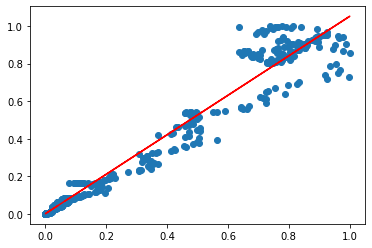

MSE = 0.0014368716521711185


In [217]:
plt.scatter(X_train, y_train)             #Plot blue dots with real data
plt.plot(X_train, Y_pred, color='red')    #Plot red line with prediction
plt.show()         
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE
#Show the plot

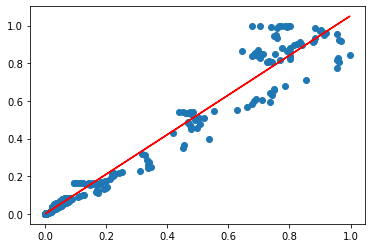

MSE = 0.0015031148493868387


In [218]:
Y_pred = linear_regressor.predict(X_test)  # Predict the model on X_test
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))